# Determinando cores dominantes de uma imagem utilizando agrupamento via k-means

Código baseado na parte final deste artigo https://goo.gl/bpkVn3 


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import imutils
import cv2
import pprint
from matplotlib import pyplot as plt

A função ***getColorInfomation*** processa as saídas do algoritmo de agrupamento k-means.

Recebe como entrada os rótulos (***labels***) e os centróides dos clusters  (***clusters***) obtidos do algoritmo k-means e retorna uma lista de dicionários das cores extraídas.


In [ ]:
def getColorInformation(labels, clusters):
  
  # Contador de ocorrências de cada cor estimada (predita) pelo kmeans
  occurence_counter = Counter(labels)
  print(occurence_counter)
  
  # Array de dicionários de cores
  colorInformation = []
 
  # Obtém a soma total de todas as ocorrências preditas
  totalOccurance = sum(occurence_counter.values()) 
  
  # Percorre todas as cores dominantes (mais frequentes) preditas
  for x in occurence_counter.most_common(len(clusters)):
    
    index = (int(x[0]))
    
    # Converte o número da cor em uma lista de 3 componentes (RGB)
    color = clusters[index].tolist()
    
    # Obtém a porcentagem da cada cor
    color_percentage= (x[1]/totalOccurance)
    
    # Constrói o dicionário que mapeia índices de cores em cores e porcentagens
    colorInfo = {"cluster_index":index , "color": color , "color_percentage" : color_percentage }
    
    # Acrescenta o dicionário à lista de dicionários de cores
    colorInformation.append(colorInfo)
    
  return colorInformation 

A função ***extractDominantColor*** chama a função acima após agrupar as cores pelo algoritmo k-means.

Recebe como entrada uma imagem RGB (3 canais, 8 bits por canal) e o número de cores dominantes a serem extraídas.

**KMeans** é usado para agrupar os pixels de acordo com a similaridade entre seus valores RGB.

In [ ]:
def extractDominantColor(image,number_of_colors=5):
    
  # Cria uma cópia da imagem
  img = image.copy()
  
  # Reorganiza a imagem para que que seja um longo array unidimensional de RGBs
  img = img.reshape((img.shape[0]*img.shape[1]) , 3)
  
  #Inicializa o objeto KMeans, informando o número de clusters desejado
  clustering = KMeans(n_clusters=number_of_colors, random_state=0)
  
  # Realiza o agrupamento
  clustering.fit(img)
  
  # Obtém a informação das cores dominantes a partir dos rótulos e centróides dos clusters encontrados
  colorInformation = getColorInformation(clustering.labels_, clustering.cluster_centers_)
  
  return colorInformation


***plotColorBar*** representa visualmente a informação de cor extraída.

Recebe como entrada (***colorInformation***) e retorna uma imagem  de dimensões 500x100 representando as cores encontradas

In [ ]:
def plotColorBar(colorInformation):
  #Create a 500x100 black image
  color_bar = np.zeros((100,500,3), dtype="uint8")
  
  top_x = 0
  for x in colorInformation:    
    bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

    color = tuple(map(int,(x['color'])))
  
    cv2.rectangle(color_bar , (int(top_x),0) , (int(bottom_x),color_bar.shape[0]) ,color , -1)
    top_x = bottom_x
  return color_bar

A função ***prety_print_dat*** mostra as cores de forma textual.

In [ ]:
def prety_print_data(color_info):
  for x in color_info:
    print(pprint.pformat(x))
    print()

## Executando o código com imagens


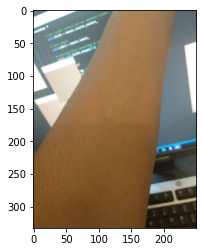

Counter({0: 27681, 4: 22548, 3: 17903, 1: 7992, 2: 7126})
Color Bar


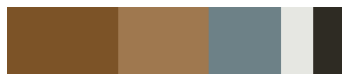

Color Information
{'cluster_index': 0,
 'color': [124.48298656263466, 83.57607282185832, 39.710952174548545],
 'color_percentage': 0.33250450450450453}

{'cluster_index': 4,
 'color': [159.7085699077347, 120.62229418026585, 79.91634137686187],
 'color_percentage': 0.27084684684684684}

{'cluster_index': 3,
 'color': [109.33674096419065, 129.13300932908416, 135.05597452655587],
 'color_percentage': 0.21505105105105105}

{'cluster_index': 1,
 'color': [230.90454147378824, 231.78468660079852, 226.175903915919],
 'color_percentage': 0.096}

{'cluster_index': 2,
 'color': [46.76865881032418, 43.47839506172416, 35.07491582491936],
 'color_percentage': 0.0855975975975976}



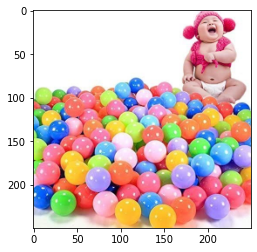

Counter({0: 21682, 2: 13369, 4: 12972, 1: 8945, 3: 5532})
Color Bar


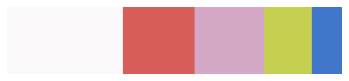

Color Information
{'cluster_index': 0,
 'color': [252.13193707615437, 249.74512155740916, 251.7066014669927],
 'color_percentage': 0.346912}

{'cluster_index': 2,
 'color': [215.32207190372893, 94.44113909860249, 89.71103968906499],
 'color_percentage': 0.213904}

{'cluster_index': 4,
 'color': [212.22451184687765, 169.47449255228685, 198.12695840086445],
 'color_percentage': 0.207552}

{'cluster_index': 1,
 'color': [197.41042272422496, 208.03522701856207, 80.39118765376878],
 'color_percentage': 0.14312}

{'cluster_index': 3,
 'color': [64.89900811541088, 119.13507664562468, 202.23985572587924],
 'color_percentage': 0.088512}



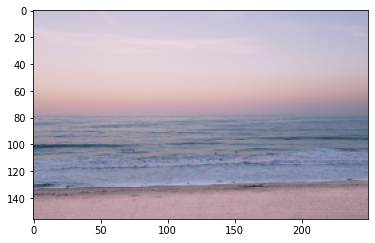

Counter({1: 11081, 3: 9691, 2: 7822, 4: 5782, 0: 4624})
Color Bar


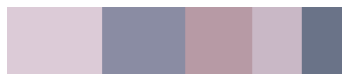

Color Information
{'cluster_index': 1,
 'color': [220.23291253381257, 203.73300270514412, 215.11433724076676],
 'color_percentage': 0.28412820512820514}

{'cluster_index': 3,
 'color': [138.54329406902087, 140.5152924157921, 163.80708824137028],
 'color_percentage': 0.2484871794871795}

{'cluster_index': 2,
 'color': [183.10849840255605, 154.93405750798746, 165.85840255590944],
 'color_percentage': 0.20056410256410256}

{'cluster_index': 4,
 'color': [201.01383365035363, 184.85595711568635, 198.23759294483642],
 'color_percentage': 0.14825641025641026}

{'cluster_index': 0,
 'color': [106.56141868511943, 115.39770761246038, 136.35423875432343],
 'color_percentage': 0.11856410256410256}



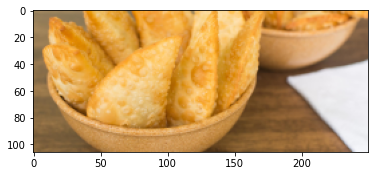

Counter({2: 7294, 3: 6896, 0: 5487, 4: 4537, 1: 2286})
Color Bar


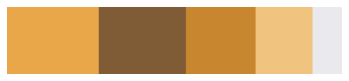

Color Information
{'cluster_index': 2,
 'color': [233.01711859764887, 167.7833470282125, 74.79019446727007],
 'color_percentage': 0.2752452830188679}

{'cluster_index': 3,
 'color': [127.65883717559083, 92.17427867187831, 53.464259823112315],
 'color_percentage': 0.26022641509433964}

{'cluster_index': 0,
 'color': [200.1849001282753, 135.40260216236, 46.55176837090068],
 'color_percentage': 0.2070566037735849}

{'cluster_index': 4,
 'color': [240.5209567698069, 195.65964450296457, 127.47245995172352],
 'color_percentage': 0.17120754716981132}

{'cluster_index': 1,
 'color': [234.4927853082645, 233.6248360297352, 237.4101442938288],
 'color_percentage': 0.08626415094339622}



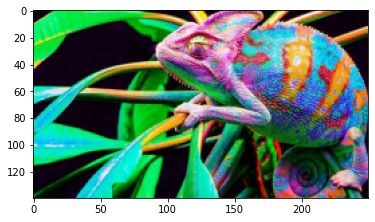

Counter({1: 13698, 0: 5991, 3: 5593, 4: 5404, 2: 4314})
Color Bar


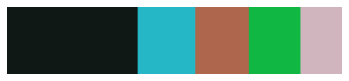

Color Information
{'cluster_index': 1,
 'color': [16.389282324609326, 24.159743009407038, 21.71409797767916],
 'color_percentage': 0.3913714285714286}

{'cluster_index': 0,
 'color': [37.27322860962421, 183.32486631015234, 197.0843917112378],
 'color_percentage': 0.17117142857142856}

{'cluster_index': 3,
 'color': [174.84128686327702, 103.91420911528154, 77.70598748883035],
 'color_percentage': 0.1598}

{'cluster_index': 4,
 'color': [16.160377358488326, 183.5808361080189, 66.31613022567345],
 'color_percentage': 0.1544}

{'cluster_index': 2,
 'color': [208.1303844372457, 180.56345530337416, 190.34946734599015],
 'color_percentage': 0.12325714285714286}



In [ ]:
images=['https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin.jpg',\
        'https://images-na.ssl-images-amazon.com/images/I/51etGcPuIzL._AC_.jpg',\
        'https://images.unsplash.com/photo-1532469342119-c1ac6eb66912?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1700&q=80',\
        'https://portal.minervafoods.com/files/styles/blog_post_page/public/pastel_-_blog.jpg?itok=WDEyWrcW',\
        #'https://www.geek.com/wp-content/uploads/2019/04/pantherchameleon1-625x352.jpg',\
        'https://social.hays.com/wp-content/uploads/2018/01/ThinkstockPhotos-669057792-660x372.jpg']

# Get Image from URL. If you want to upload an image file and use that comment the below code and replace with  image=cv2.imread("FILE_NAME")
for imgstr in images:
  image =  imutils.url_to_image(imgstr)

  # Resize image to a width of 250
  image = imutils.resize(image,width=250)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  #Show image
  plt.imshow(image)
  plt.show()


  # Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors 
  dominantColors = extractDominantColor(image, number_of_colors=5)

  #Show in the dominant color as bar
  print("Color Bar")
  colour_bar = plotColorBar(dominantColors)
  plt.axis("off")
  plt.imshow(colour_bar)
  plt.show()

  #Show in the dominant color information
  print("Color Information")
  prety_print_data(dominantColors)


## Atividade Bonus
Implemente uma função que compare as informações das K cores dominantes C1=((c11,p11), (c12,p12),..., (c1K, p1K)), C2=((c21, p212), (c22, p22),...,(c2K, p2K)) de duas imagens coloridas (I1, I2) recebidas como entrada, em que cij  é uma cor e pij é o seu percentual presente na imagem. Utilize o seguinte pseudo-código como referência para implementar sua função que mede a similaridade entre as imagens:

>acumulador=0<br>
>Para i=1:K (em que i=1 é a cor de maior ocorrência na imagem e K é a de menor ocorrência)<br>
>> d= (1-distância_euclidiana(c1i, c2i))<br>
>> acumulador = acumulador + d * (1-abs(p1i - p2i))

Inclua código para comparar pelo menos 5 imagens visualmente semelhantes e 5 imagens visualmente diferentes (no tocante às cores), utilizando a sua função. Os valores retornados pela função correlacionam bem com as semelhanças/diferenças visuais (em termos de cores) das imagens de teste? Comente.


In [ ]:
dominantColors

[{'cluster_index': 1,
  'color': [16.389282324609326, 24.159743009407038, 21.71409797767916],
  'color_percentage': 0.3913714285714286},
 {'cluster_index': 0,
  'color': [37.27322860962421, 183.32486631015234, 197.0843917112378],
  'color_percentage': 0.17117142857142856},
 {'cluster_index': 3,
  'color': [174.84128686327702, 103.91420911528154, 77.70598748883035],
  'color_percentage': 0.1598},
 {'cluster_index': 4,
  'color': [16.160377358488326, 183.5808361080189, 66.31613022567345],
  'color_percentage': 0.1544},
 {'cluster_index': 2,
  'color': [208.1303844372457, 180.56345530337416, 190.34946734599015],
  'color_percentage': 0.12325714285714286}]

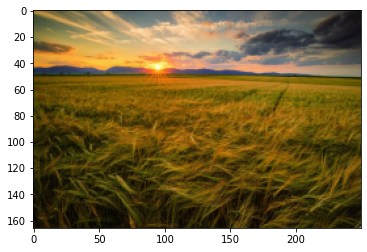

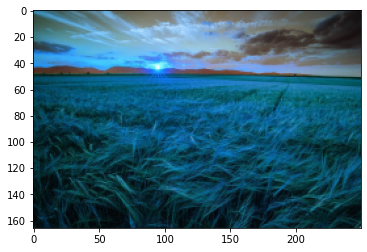

Counter({2: 11264, 0: 11194, 4: 8614, 1: 5627, 3: 4801})
Counter({2: 11264, 0: 11194, 4: 8614, 1: 5627, 3: 4801})
Color Bar


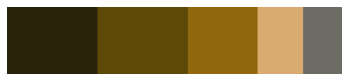

Color Bar 2


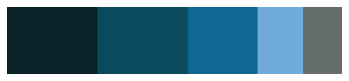

Color Information
{'cluster_index': 2,
 'color': [41.57792553192044, 35.386879432628184, 10.836258865245487],
 'color_percentage': 0.27142168674698797}

{'cluster_index': 0,
 'color': [93.50437500000253, 74.12196428571167, 9.986160714283116],
 'color_percentage': 0.2697349397590361}

{'cluster_index': 4,
 'color': [146.96401956218486, 104.71273870516598, 14.58500232882913],
 'color_percentage': 0.20756626506024095}

{'cluster_index': 1,
 'color': [217.1216048286933, 171.93751109533963, 113.82211965205646],
 'color_percentage': 0.13559036144578313}

{'cluster_index': 3,
 'color': [108.9877057720358, 108.16836841008275, 100.4609293602818],
 'color_percentage': 0.11568674698795181}

506.94629059082854


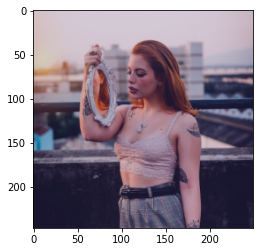

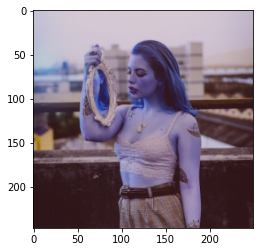

Counter({4: 17756, 2: 13073, 0: 12814, 1: 9128, 3: 8979})
Counter({4: 17756, 2: 13073, 0: 12814, 1: 9128, 3: 8979})
Color Bar


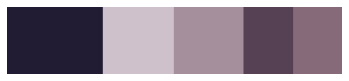

Color Bar 2


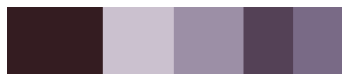

Color Information
{'cluster_index': 4,
 'color': [33.37865719602861, 28.461299960549027, 52.520153334462364],
 'color_percentage': 0.28754655870445345}

{'cluster_index': 2,
 'color': [207.77341897990456, 193.68792536515497, 203.27682190103758],
 'color_percentage': 0.2117085020242915}

{'cluster_index': 0,
 'color': [166.50548680830667, 143.0138532181537, 156.8660596155277],
 'color_percentage': 0.20751417004048583}

{'cluster_index': 1,
 'color': [86.14492912866574, 65.79013295242217, 84.88319964838746],
 'color_percentage': 0.14782186234817815}

{'cluster_index': 3,
 'color': [134.7628005342806, 106.01892252894052, 121.65906055209221],
 'color_percentage': 0.1454089068825911}

67.37736242975909


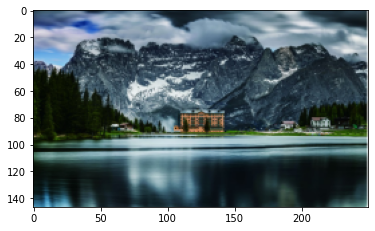

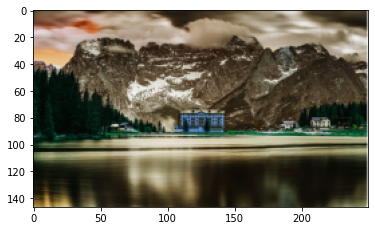

Counter({1: 10375, 3: 9765, 2: 6148, 4: 6084, 0: 4378})
Counter({1: 10375, 3: 9765, 2: 6148, 4: 6084, 0: 4378})
Color Bar


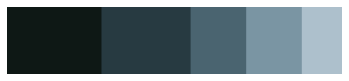

Color Bar 2


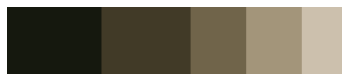

Color Information
{'cluster_index': 1,
 'color': [14.527246376822902, 24.582608695648553, 21.19352657005848],
 'color_percentage': 0.282312925170068}

{'cluster_index': 3,
 'color': [39.3004401678792, 58.649708260819885, 65.07237178830557],
 'color_percentage': 0.26571428571428574}

{'cluster_index': 2,
 'color': [74.54171409985334, 100.87689055130939, 112.91657180029343],
 'color_percentage': 0.16729251700680273}

{'cluster_index': 4,
 'color': [122.42840722496588, 149.9366174055837, 163.83103448275105],
 'color_percentage': 0.16555102040816327}

{'cluster_index': 0,
 'color': [173.8310564663144, 192.66712204007638, 204.35314207649512],
 'color_percentage': 0.11912925170068027}

201.86170770777989


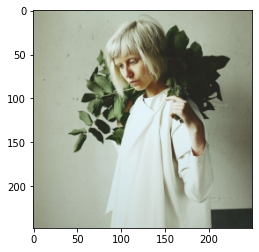

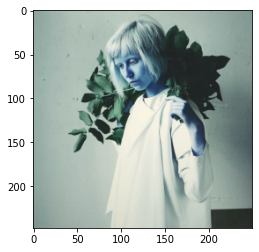

Counter({4: 20532, 1: 14342, 0: 10734, 2: 8678, 3: 7714})
Counter({4: 20532, 1: 14342, 0: 10734, 2: 8678, 3: 7714})
Color Bar


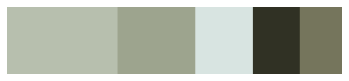

Color Bar 2


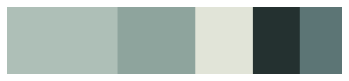

Color Information
{'cluster_index': 4,
 'color': [183.0294260937498, 191.29411478125172, 174.82276137580968],
 'color_percentage': 0.3311612903225806}

{'cluster_index': 1,
 'color': [157.41303590101063, 164.00822586266932, 142.07333565702515],
 'color_percentage': 0.23132258064516129}

{'cluster_index': 0,
 'color': [216.6235206411513, 228.28198676729858, 225.62389339298025],
 'color_percentage': 0.1731290322580645}

{'cluster_index': 2,
 'color': [48.898699205730395, 49.512029469300444, 36.98687694256637],
 'color_percentage': 0.13996774193548386}

{'cluster_index': 3,
 'color': [117.32641680716245, 117.2589806769603, 92.07171573076528],
 'color_percentage': 0.12441935483870968}

98.58943925885524


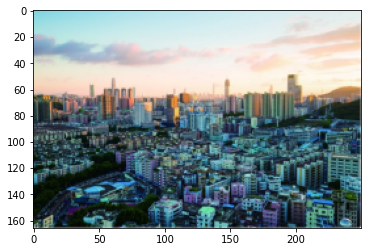

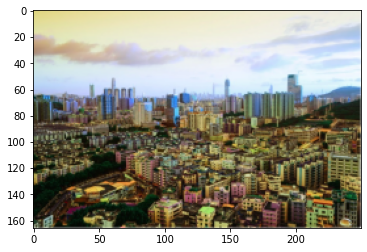

Counter({3: 12603, 1: 9249, 2: 8703, 4: 7275, 0: 3670})
Counter({3: 12603, 1: 9249, 2: 8703, 4: 7275, 0: 3670})
Color Bar


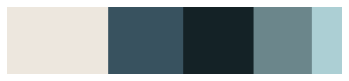

Color Bar 2


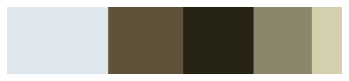

Color Information
{'cluster_index': 3,
 'color': [237.47953771867867, 231.5757935565291, 222.1475500672803],
 'color_percentage': 0.3036867469879518}

{'cluster_index': 1,
 'color': [56.60136378396004, 82.56791860591278, 95.7061370278135],
 'color_percentage': 0.22286746987951808}

{'cluster_index': 2,
 'color': [20.324787307413544, 34.69234306735164, 38.44642446539066],
 'color_percentage': 0.20971084337349397}

{'cluster_index': 4,
 'color': [107.13545104510342, 134.48776127612774, 139.41240374037582],
 'color_percentage': 0.1753012048192771}

{'cluster_index': 0,
 'color': [172.93985784581972, 207.71842536905677, 212.5817386549997],
 'color_percentage': 0.08843373493975903}

204.32166032299108


In [ ]:
from scipy.spatial import distance


def getSimilarity(list_dicts_img1, list_dicts_img2):
  acumulador = 0
  for pos in range(len(list_dicts_img1)):
    d = distance.euclidean(list_dicts_img1[pos]['color'],list_dicts_img2[pos]['color'])
    acumulador = acumulador + d*(1-abs(list_dicts_img1[pos]['color_percentage'] - list_dicts_img2[pos]['color_percentage']))
  return acumulador

similar_images_nf = ['https://drive.google.com/uc?id=1XZRrSof_A8zSsVDMx9nVmOdelx2eVcSM','https://drive.google.com/uc?id=1I8zzfbUuGZWwkmN2IQCM6xjghFuONZHR',
                     'https://drive.google.com/uc?id=1EqtIBDa_8H9eAF20UbFr_xZCgeu55mzF','https://drive.google.com/uc?id=1yDj8I5PTSvwJHeW_QvN0xNqvaNr9GsXJ',
                     'https://drive.google.com/uc?id=1BTUn5Qv6VC73sB_y_tbb6Sl64WkfQ6Wg']
similar_images_wf = ['https://drive.google.com/uc?id=1VOpUAJ-JzEbGlKBTaDnKpkKBPNUW-TsN','https://drive.google.com/uc?id=18rITjIIX58OsssgUPOvkM0gfihCKf-D0',
                     'https://drive.google.com/uc?id=1VACpfPRLAbXSEM3WBvJdcXLi5_1D2_8P','https://drive.google.com/uc?id=1tMP61ZRXR-gtlxzcVSn3gCeSop9rbrb6',
                     'https://drive.google.com/uc?id=18j2YHrPEV_vaJY5gAdklUOBtvffITmUe']


for imgstr in range(len(similar_images_nf)):
  image =  imutils.url_to_image(similar_images_nf[imgstr])
  image_2 = imutils.url_to_image(similar_images_wf[imgstr])
  # Resize image to a width of 250
  image = imutils.resize(image,width=250)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image_2 = imutils.resize(image_2,width=250)
  image = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)
  #Show image
  plt.imshow(image)
  plt.show()
  plt.imshow(image_2)
  plt.show()

  # Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors 
  dominantColors = extractDominantColor(image, number_of_colors=5)
  dominantColors_2 = extractDominantColor(image_2, number_of_colors=5)

  #Show in the dominant color as bar
  print("Color Bar")
  colour_bar = plotColorBar(dominantColors)
  plt.axis("off")
  plt.imshow(colour_bar)
  plt.show()

  print("Color Bar 2")
  colour_bar = plotColorBar(dominantColors_2)
  plt.axis("off")
  plt.imshow(colour_bar)
  plt.show()

  #Show in the dominant color information
  print("Color Information")
  prety_print_data(dominantColors)

  print(getSimilarity(dominantColors, dominantColors_2))
  

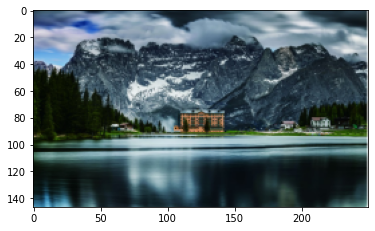

In [ ]:
similar_images_nf = ['https://drive.google.com/uc?id=1XZRrSof_A8zSsVDMx9nVmOdelx2eVcSM','https://drive.google.com/uc?id=1I8zzfbUuGZWwkmN2IQCM6xjghFuONZHR',
                     'https://drive.google.com/uc?id=1EqtIBDa_8H9eAF20UbFr_xZCgeu55mzF','https://drive.google.com/uc?id=1yDj8I5PTSvwJHeW_QvN0xNqvaNr9GsXJ',
                     'https://drive.google.com/uc?id=1BTUn5Qv6VC73sB_y_tbb6Sl64WkfQ6Wg']
similar_images_wf = ['https://drive.google.com/uc?id=1VOpUAJ-JzEbGlKBTaDnKpkKBPNUW-TsN','https://drive.google.com/uc?id=18rITjIIX58OsssgUPOvkM0gfihCKf-D0',
                     'https://drive.google.com/uc?id=1VACpfPRLAbXSEM3WBvJdcXLi5_1D2_8P','https://drive.google.com/uc?id=1tMP61ZRXR-gtlxzcVSn3gCeSop9rbrb6',
                     'https://drive.google.com/uc?id=18j2YHrPEV_vaJY5gAdklUOBtvffITmUe']


imgstr = similar_images_wf[2]
image =  imutils.url_to_image(imgstr)
#image_2 = imutils.url_to_image(imgstr)
# Resize image to a width of 250
image = imutils.resize(image,width=250)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Show image
plt.imshow(image)
plt.show()

In [ ]:
print(image)

None
